2024/4/19

build r0-r4 Fingerprint with exact FP and normal FP


Exact: radius 1024, radius 2048


Normal: radius 2048, radius 6144


Then pick top 6144



In [9]:



import time, torch, os
from fingerprint_utils import FP_generator
batch_size=64
import tqdm
import numpy as np
from matplotlib import pyplot as plt
from rdkit.Chem import AllChem
from rdkit import Chem


path_dir = "/workspace/SMILES_dataset/train/"
import pickle 
smile = pickle.load(open(f"{path_dir}/SMILES/index.pkl", "rb"))
smile[0]

'Br.C=CC1CN2CCC1CC2C(O)c1ccnc2ccc(OC)cc12'

In [2]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

def generate_FP_with_exact_radius(mol, radius=2, length=6144):

    # Dictionary to store information about which substructures contribute to setting which bits
    bitInfo = {}
    
    # Generate the fingerprint with bitInfo to track the substructures contributing to each bit
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=length, bitInfo=bitInfo)
    
    # Create an array of zeros to represent the new fingerprint
    new_fp = [0] * length
    
    # Filter bitInfo to keep only entries where substructures have the exact radius
    for bit, atoms in bitInfo.items():
        # Check if any substructure at this bit has the exact specified radius
        if any(radius_tuple[1] == radius for radius_tuple in atoms):
            # Set the corresponding bit in the new fingerprint
            new_fp[bit] = 1
    
    # Return the new filtered fingerprint as a list of bits
    return new_fp


def generate_normal_FP(mol, radius=2, length=6144):

    # Dictionary to store information about which substructures contribute to setting which bits
    bitInfo = {}
    
    # Generate the fingerprint with bitInfo to track the substructures contributing to each bit
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=length, bitInfo=bitInfo)
    new_fp = [0] * length
    for bit, atoms in bitInfo.items():
            new_fp[bit] = 1
            
    return new_fp
   


In [63]:
# '''This is generate exact-r FP and save the count at each position !!!
# Gonna take you a few minutes 
# '''

# num_plain_FPs = 5
# count = np.zeros(6144*num_plain_FPs)
# for smile_str in tqdm.tqdm(smile.values()):
    
#     mol = Chem.MolFromSmiles(smile_str)
#     mol_H = Chem.AddHs(mol) # add implicit Hs to the molecule
#     all_plain_fps = []
#     for radius in range(num_plain_FPs):
#         all_plain_fps.append(generate_FP_with_exact_radius(mol_H, radius=radius, length=6144))
#     concated_FP = np.concatenate(all_plain_fps)
    
#     count+= concated_FP
# np.save(f"count_exact_r0_to_r{num_plain_FPs-1}_FP.npy", count)

In [20]:
# '''This is generate normal FP and save the count at each position !!!
# Gonna take you a few minutes 
# '''

num_plain_FPs = 16
# count = np.zeros(6144*num_plain_FPs)
# for smile_str in tqdm.tqdm(smile.values()):
    
#     mol = Chem.MolFromSmiles(smile_str)
#     mol_H = Chem.AddHs(mol) # add implicit Hs to the molecule
#     all_plain_fps = []
#     for radius in range(num_plain_FPs):
#         all_plain_fps.append(generate_normal_FP(mol_H, radius=radius, length=6144))
#     concated_FP = np.concatenate(all_plain_fps)
    
#     count+= concated_FP

# np.save(f"count_normal_FP_r0_r15.npy", count)

r0_r15 = np.load("count_normal_FP_r0_r15.npy")
r0_r4 = np.load("count_r0_to_r4_FP.npy")

array([  350,  1366,  1380, ..., 30713, 30714, 30716])

In [17]:
"""to show that:
why r0-r4 entropy based works? give more weight to low-radius but high entropy bits 

"""

# r0_r4_indices = np.load("indices_kept_r0_to_r4.npy")

# r0_r4_indices.sort()

# r = [0]*5
# r[0]= r0_r4_indices [r0_r4_indices<6144]
# r[1] = r0_r4_indices [(r0_r4_indices>=6144) & (r0_r4_indices<6144*2)]
# r[2] = r0_r4_indices [(r0_r4_indices>=6144*2) & (r0_r4_indices<6144*3)]
# r[3] = r0_r4_indices [(r0_r4_indices>=6144*3) & (r0_r4_indices<6144*4)]
# r[4] = r0_r4_indices [(r0_r4_indices>=6144*4) & (r0_r4_indices<6144*5)]

# for i in range(4):
#     small_set = set(r[i])
#     large_set = set(r[i+1]-6144)
#     print(len(small_set), len(large_set),len(small_set.intersection(large_set)))
#     print(small_set<=large_set)


29 413 29
True
413 947 413
True
947 1697 947
True
1697 3058 1697
True


In [4]:
# count = np.zeros(2048*5)
# for smile_str in tqdm.tqdm(smile.values()):
#     concat_r2 = FP_generator(smile_str, 4)
    
#     count+= concat_r2
# np.save("count_hyun_r4_FP.npy", count)

In [53]:
# old code, using radius of inclusion
hyun_r4_count = np.load("count_hyun_r4_FP.npy")
r0_to_r4_FP_count = np.load("count_r0_to_r4_FP.npy")
r0_to_r6_exact_FP_count = np.load("count_exact_r0_to_r6_FP.npy")

In [46]:
# len(hyun_r4_count), len(r0_to_r4_FP_count)
count = np.load(f"count_exact_r0_to_r{num_plain_FPs-1}_FP.npy")
r0_rEND_FP_count = count 
len(count)

30720

In [47]:
# hyun_fp_count = torch.zeros(6144)
# r2_fp_count = torch.zeros(6144)

# for file in os.listdir(f"{path_dir}/HYUN_FP"):
#     # dataset
#     hyun_fp = torch.load(f"{path_dir}/HYUN_FP/{file}")
#     r2_fp = torch.load(f"{path_dir}/R2-6144FP/{file}")
#     hyun_fp_count+=hyun_fp
#     r2_fp_count+=r2_fp

In [21]:
def compute_entropy(data, use_natural_log=False):
    probability = data/len(smile)
    if use_natural_log:
        entropy = (probability * np.log(np.clip(probability,1e-7 ,1)) )
    else:
        entropy = (probability * np.log2(np.clip(probability,1e-7 ,1)) )
    return entropy

def keep_smallest_entropy(data, size=6144,  use_natural_log=False):
    entropy = compute_entropy(data, use_natural_log)
    indices_of_min_6144 = np.argsort(entropy)[:size]
    # print(entropy, indices_of_min_6144)
    total_entropy = entropy[indices_of_min_6144].sum()
    return total_entropy, indices_of_min_6144



In [23]:
entropy = compute_entropy(data=r0_r15, use_natural_log=False)
indices_of_top_entropy = np.argsort(entropy)[:6144]

In [28]:
# """temp"""



# r = [0]*16
# for i in range(16):
#     r[i] = indices_of_top_entropy[(i*6144<indices_of_top_entropy) & (indices_of_top_entropy<(i+1)*6144)]
# for i in range(15):
#     small_set = set(r[i])
#     large_set = set(r[i+1]-6144)
#     print(len(small_set), len(large_set),len(small_set.intersection(large_set)))
#     print(small_set<=large_set)


19 170 19
True
170 262 170
True
262 300 262
True
300 341 300
True
341 373 341
True
373 404 373
True
404 430 404
True
430 448 430
True
448 457 448
True
457 467 457
True
467 484 467
True
484 486 484
True
486 495 486
True
495 502 495
True
502 506 502
True


In [55]:
# entropy_hyun_fp, _ = keep_smallest_entropy(hyun_fp_count)
# entropy_r2_fp, _ = keep_smallest_entropy(r2_fp_count)
entropy_shortened_r0_to_r4_FP, indices_kept_r0_to_r4 = keep_smallest_entropy(r0_to_r4_FP_count)
entropy_shortened_hyun_r4, indices_kept_hyun_r4 = keep_smallest_entropy(hyun_r4_count)

entropy_shortened_r0_to_rEND_FP, indices_kept_r0_to_rEND = keep_smallest_entropy(r0_rEND_FP_count)
entropy_shortened_r0_to_r6_FP, indices_kept_r0_to_rEND = keep_smallest_entropy(r0_to_r6_exact_FP_count)


In [57]:
# print(f"entropy_hyun_fp: {entropy_hyun_fp}")
# print(f"entropy_r2_fp: {entropy_r2_fp}")
print(f"entropy_shortened_r0_to_r4_FP: {entropy_shortened_r0_to_r4_FP}")
print(f"entropy_shortened_hyun_FP: {entropy_shortened_hyun_r4}")
print(f"entropy_shortened_r0_to_r{num_plain_FPs-1}_FP_exact_radius: {entropy_shortened_r0_to_rEND_FP}")
print(f"entropy_shortened_r0_to_r6_FP_exact_radius: {entropy_shortened_r0_to_r6_FP}")

entropy_shortened_r0_to_r4_FP: -776.8895912939214
entropy_shortened_hyun_FP: -483.89706157450036
entropy_shortened_r0_to_r4_FP_exact_radius: -345.7780746562493
entropy_shortened_r0_to_r6_FP_exact_radius: -351.61111574613005


Text(0.5, 1.0, 'indices_kept_r0_to_r4')

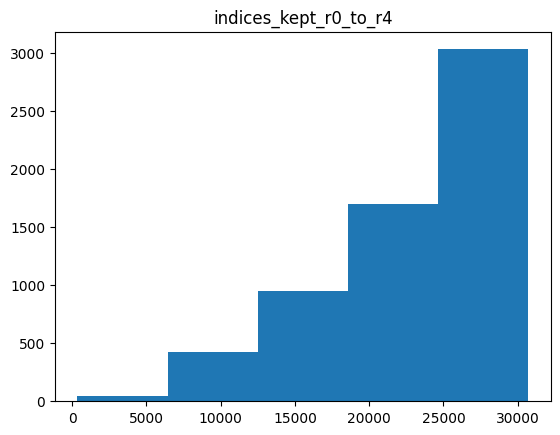

In [50]:
from matplotlib import pyplot as plt
plt.hist(indices_kept_r0_to_r4, bins=5)
plt.title("indices_kept_r0_to_r4")

Text(0.5, 1.0, 'indices_kept_r0_to_r6')

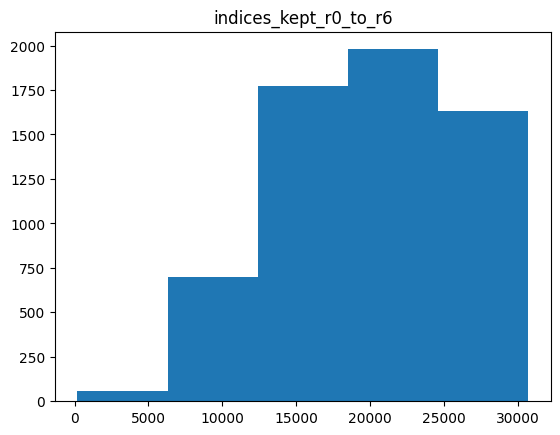

In [51]:
plt.hist(indices_kept_r0_to_rEND, bins=num_plain_FPs)
plt.title("indices_kept_r0_to_r6")

In [43]:
# which_radius = indices_kept_r0_to_r4//6144
# plt.hist(which_radius,bins=5)
# plt.title("radius_kept_r0_to_r4")

Text(0.5, 1.0, 'Probability of each bit being 1 (old FPs from r0 to r4)')

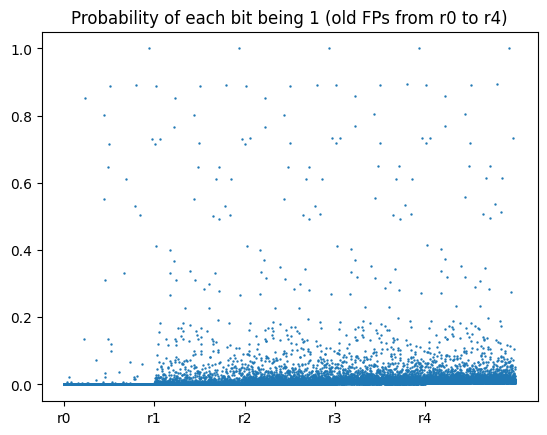

In [73]:
plt.scatter(range(6144*5),r0_to_r4_FP_count/len(smile), s =0.5)
plt.xticks(np.arange(0,6144*5, 6144), labels=[f"r{r}" for r in range(5)])
plt.title("Probability of each bit being 1 (old FPs from r0 to r4)" )

Text(0.5, 1.0, 'Probability of each bit being 1 (old FPs from r0 to r4), after entropy')

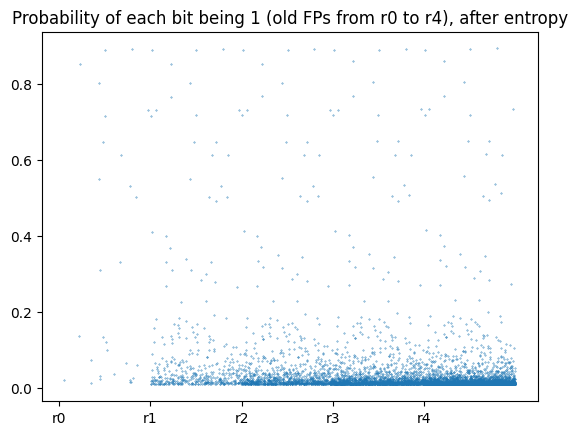

In [71]:
show_only_selected_new = np.array([r0_to_r4_FP_count[i] for i in indices_kept_r0_to_r4])
plt.scatter(indices_kept_r0_to_r4,show_only_selected_new/len(smile), s =0.1)
plt.xticks(np.arange(0,6144*5, 6144), labels=[f"r{r}" for r in range(5)])
plt.title("Probability of each bit being 1 (old FPs from r0 to r4), after entropy" )

Text(0.5, 1.0, 'Probability of each bit being 1 (exact FPs from r0 to r6)')

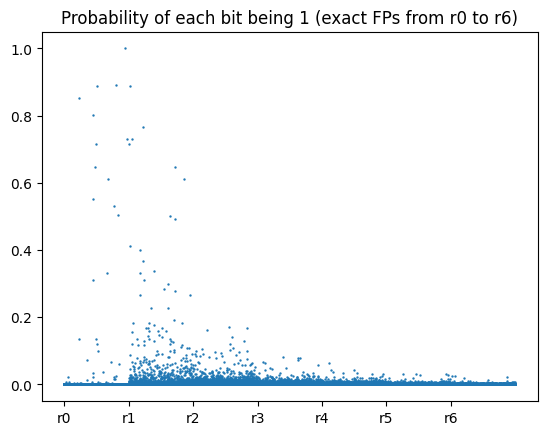

In [74]:
plt.scatter(range(6144*7),count/len(smile), s =0.5)

plt.xticks(np.arange(0,6144*7, 6144), labels=[f"r{r}" for r in range(7)])
plt.title("Probability of each bit being 1 (exact FPs from r0 to r6)" )

In [49]:
indices_kept_r0_to_r6

array([ 7485,  8580,  7217, ..., 27305, 30648, 22947])

Text(0.5, 1.0, 'Probability of each bit being 1 (exact FPs from r0 to r7)')

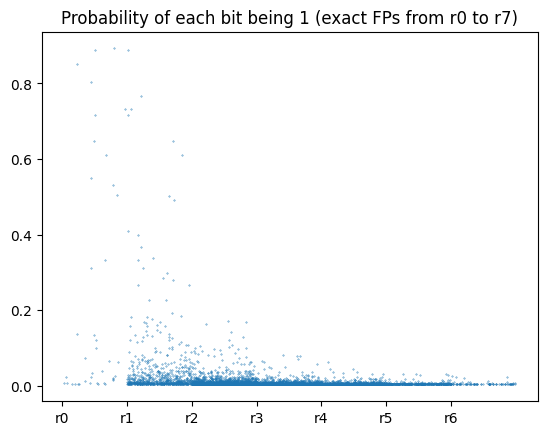

In [67]:
show_only_selected_new = np.array([count[i] for i in indices_kept_r0_to_r6])
plt.scatter(indices_kept_r0_to_r6,show_only_selected_new/len(smile), s =0.1)
plt.xticks(np.arange(0,6144*7, 6144), labels=[f"r{r}" for r in range(7)])
plt.title("Probability of each bit being 1 (exact FPs from r0 to r7)" )

In [76]:
for i in show_only_selected_new/len(smile):
    print(i)

0.3673822556993615
0.37072490960261584
0.37185430765167177
0.37302924594464126
0.3535653456959916
0.3523539752078912
0.3501225032561274
0.34621515032834516
0.34502199593781024
0.34399278642536407
0.33833668813130163
0.33726193837494195
0.3998342335121547
0.40079057863433915
0.33540389642326923
0.402111245707832
0.33401947300829743
0.40345012887889026
0.3327261300811527
0.332434672520106
0.3324255644713233
0.41070013570992686
0.4123851247347281
0.413077336442214
0.41453462424744747
0.3207399378831073
0.3192006776388294
0.31869062690699773
0.3173153115408086
0.31655023544306105
0.314546464710865
0.31099432568560836
0.3109852176368257
0.3109852176368257
0.306713542757735
0.3043545581230133
0.29990983031705115
0.2988897288533877
0.28870693031431877
0.2873589390944778
0.28556465348428406
0.28519122348419296
0.2844443634840108
0.28166640860528447
0.2803093093366608
0.27948047689743427
0.27503574909147216
0.27193901250535096
0.27191168835900287
0.2705454810415965
0.2694798393340195
0.26852349

In [20]:
np.save(f"indices_kept_r0_to_r{num_plain_FPs-1}_new.npy", indices_kept_r0_to_r6)

In [77]:
reduced_count = count[indices_kept_r0_to_r6]
reduced_count.min(), reduced_count.max()

(388.0, 97981.0)

In [78]:
len(reduced_count)

6144

In [42]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define the SMILES string for the molecule you are interested in
smiles_string = 'CCO'  # Example SMILES for ethanol

# Convert the SMILES string to an RDKit molecule object
mol = Chem.MolFromSmiles(smiles_string)

# Generate the count-based Morgan fingerprint
# radius: The radius of the circular fingerprints
# useCounts: Set to True to use count-based fingerprints
# nBits: The length of the fingerprint bit vector
fp_count = AllChem.GetHashedMorganFingerprint(mol_H, radius=2, nBits=6144)
fp_bit = AllChem.GetMorganFingerprintAsBitVect(mol_H,radius=2,nBits=6144)

# fp now contains the count-based Morgan fingerprint for the molecule


In [43]:
fp_dict = fp_count.GetNonzeroElements()
fp_dict 

{91: 3,
 1008: 1,
 1056: 1,
 1365: 1,
 1452: 1,
 1839: 1,
 3105: 1,
 4176: 1,
 4303: 1,
 4903: 1,
 5138: 1,
 5244: 2,
 5748: 6}

In [52]:
fp_out = torch.zeros(6144).float()
fp_out[list(fp_dict.keys())] = torch.tensor( list(map(lambda x:float(x), fp_dict.values())))

In [55]:
fp_out.nonzero(), fp_out[91], fp_out[1008], fp_out[1452]

(tensor([[  91],
         [1008],
         [1056],
         [1365],
         [1452],
         [1839],
         [3105],
         [4176],
         [4303],
         [4903],
         [5138],
         [5244],
         [5748]]),
 tensor(3.),
 tensor(1.),
 tensor(1.))

In [36]:
tsr_fp = torch.tensor(fp_bit)

In [37]:
tsr_fp.nonzero()

tensor([[  91],
        [1008],
        [1056],
        [1365],
        [1452],
        [1839],
        [3105],
        [4176],
        [4303],
        [4903],
        [5138],
        [5244],
        [5748]])

In [48]:
torch.zeros(6144)


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [6]:

import numpy as np
from rdkit.Chem import rdMolDescriptors
import torch
import matplotlib.pyplot as plt 
import os

all_fps = os.listdir("/workspace/SMILES_dataset/train/")
all_fps = list(filter(lambda x: x.endswith("FP"), all_fps))
all_fps.remove("R2-6144-count-based-FP")
all_fps

['R2-6144FP',
 'HYUN_FP',
 'R0_to_R4_reduced_FP',
 'R0_to_R4_30720_FP',
 'R3-6144FP',
 'R4-6144FP',
 'R5-6144FP',
 'R6-6144FP',
 'R7-6144FP',
 'R8-6144FP',
 'R9-6144FP',
 'R10-6144FP']

In [8]:
total_train_samples = len(os.listdir(f"/workspace/SMILES_dataset/train/{all_fps[0]}"))
total_train_samples

109694

In [21]:
''' compute entropy for each FP '''
def compute_entropy(data):
    probability = data/total_train_samples
    entropy = -(probability * np.log(np.clip(probability,1e-7 ,1)) )
    return torch.sum(entropy/len(data))



In [25]:
import tqdm
for fp in all_fps:
    counts = torch.zeros(len(torch.load(f"/workspace/SMILES_dataset/train/{fp}/0.pt")))
    for f in tqdm.tqdm(os.listdir(f"/workspace/SMILES_dataset/train/{fp}")):
        counts = counts+ torch.load(f"/workspace/SMILES_dataset/train/{fp}/{f}")
    # prob = counts/total_train_samples
    # print(counts)
    avg_entropy = compute_entropy(counts)
    print(f"{fp} has avg entropy: {avg_entropy}")
    # break

  0%|          | 0/109694 [00:00<?, ?it/s]

100%|██████████| 109694/109694 [00:17<00:00, 6253.21it/s]


R2-6144FP has avg entropy: 0.030047358945012093


100%|██████████| 109694/109694 [00:59<00:00, 1838.02it/s]


HYUN_FP has avg entropy: 0.02789202705025673


100%|██████████| 109694/109694 [00:46<00:00, 2380.42it/s]


R0_to_R4_reduced_FP has avg entropy: 0.0876380056142807


100%|██████████| 109694/109694 [01:16<00:00, 1439.02it/s]


R0_to_R4_30720_FP has avg entropy: 0.028658511117100716


100%|██████████| 109694/109694 [00:46<00:00, 2357.31it/s]


R3-6144FP has avg entropy: 0.04435696452856064


100%|██████████| 109694/109694 [00:45<00:00, 2401.26it/s]


R4-6144FP has avg entropy: 0.05598423629999161


100%|██████████| 109694/109694 [00:45<00:00, 2410.41it/s]


R5-6144FP has avg entropy: 0.06416505575180054


100%|██████████| 109694/109694 [00:45<00:00, 2388.46it/s]


R6-6144FP has avg entropy: 0.0695945993065834


100%|██████████| 109694/109694 [00:46<00:00, 2378.04it/s]


R7-6144FP has avg entropy: 0.07342611253261566


100%|██████████| 109694/109694 [00:46<00:00, 2365.26it/s]


R8-6144FP has avg entropy: 0.07608737051486969


100%|██████████| 109694/109694 [00:47<00:00, 2309.14it/s]


R9-6144FP has avg entropy: 0.07797195762395859


100%|██████████| 109694/109694 [00:47<00:00, 2302.22it/s]

R10-6144FP has avg entropy: 0.07936462759971619


In [22]:
compute_entropy(counts)

tensor(0.0300)

In [23]:
len(counts)

6144